<a href="https://colab.research.google.com/github/brenoslivio/SME0828_DataScience/blob/master/Projects/3%20-%20Classifica%C3%A7%C3%A3o/Projeto3_Classificacao_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0828 - Introdução à Ciência de Dados
# Projeto 3: Classificação 

### Alunos

Aline Fernanda da Conceição, Nº USP: 9437275

Breno Lívio Silva de Almeida, Nº USP: 10276675

Matheus Victal Cerqueira, Nº USP: 10276661

***Universidade de São Paulo, São Carlos, Brasil.***

## Exercícios sugeridos para a atividade avaliativa 3

Os seguintes exercícios foram sugeridos para entrega em 03 de novembro de 2020 para a disciplina SME0828 - Ciência de Dados oferecida pelo Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP), a qual foi ministrada pelo professor Francisco Aparecido Rodrigues. Vamos trabalhar com o conjunto de dados [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset). O dataset tem várias informações sobre características de estrelas como temperatura absoluta, luminosidade relativa, tipos de estrelas, entre outros. Vamos classificar os dados considerando vários classificadores conhecidos.



---



## Sumário

1. Desenvolvimento

  1.1 [Exercício 1](#ex1)

  1.2 [Exercício 2](#ex2)

  1.3 [Exercício 3](#ex3)

  1.4 [Exercício 4](#ex4)

  1.5 [Exercício 5](#ex5)

  1.6 [Exercício 6](#ex6)



---



# Desenvolvimento

## <a name="ex3"></a> 3 - Considere o código abaixo para gerar dados artificialmente.

```
from sklearn import datasets
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
n_samples = 1000
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap=’viridis’, s=50, alpha=0.7)
plt.show(True)
```
## Compare os resultados para os métodos Naive Bayes, Classificador Bayesiano paramétrico e o classificador Bayesiano não-paramétrico, variando o ruído (noise).

Primeiramente, importemos as bibliotecas necessárias para a geração dos dados de interesse e para a sua posterior análise:

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn import datasets

Os dados que serão utilizados no decorrer do deenvolvimento deste exercício são os gerados pelo método [.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) da biblioteca sklearn. Tal método gera dados que tendem a se clusterizar em duas meia-luas conforme seu parâmetro de entrada "noise" (ruído) é diminuido. Para valores maiores de ruído, os valores tendem a se embaralhar, dificultando a classificação em um dos dois grupos existentes. Abaixo, temos um exemplo de conjunto de dados gerado pelo método.

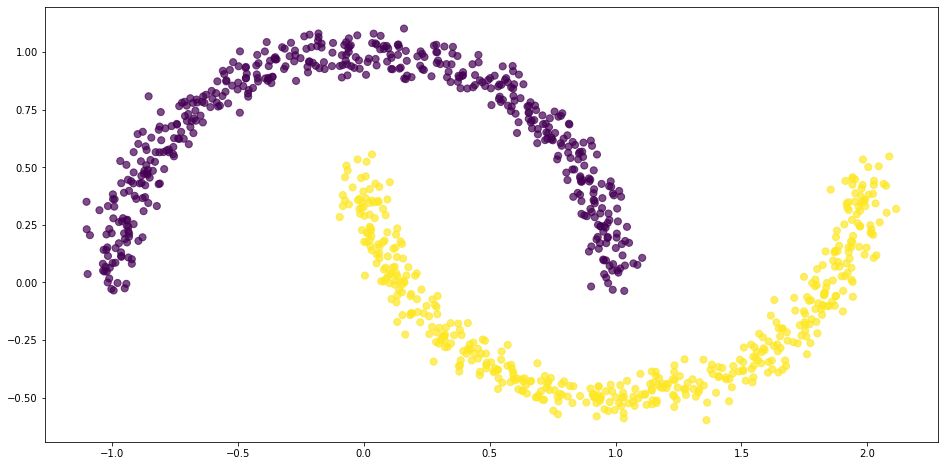

In [9]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0] #conjunto de dados a serem classificados 
y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=50, alpha=0.7)
plt.show(True)

Como é notório acima, o conjunto de dados tende a se agrupar em duas classes: uma representada pelos pontos amarelos e outra pelos pontos roxos. O ruído no exemplo é baixo (0,05), por este fato, a separação entre os grupos é bem nítida e o padrão pode ser reconhecido pelos olhos humanos. A matriz X contém as coordenadas bidimencionais dos pontos gerados pelo método .make_moons e o vetor y contém a classificação de cada ponto como sendo 0 ou 1. Vejamos agora o que ocorre caso o rúido seja relativamente alto.

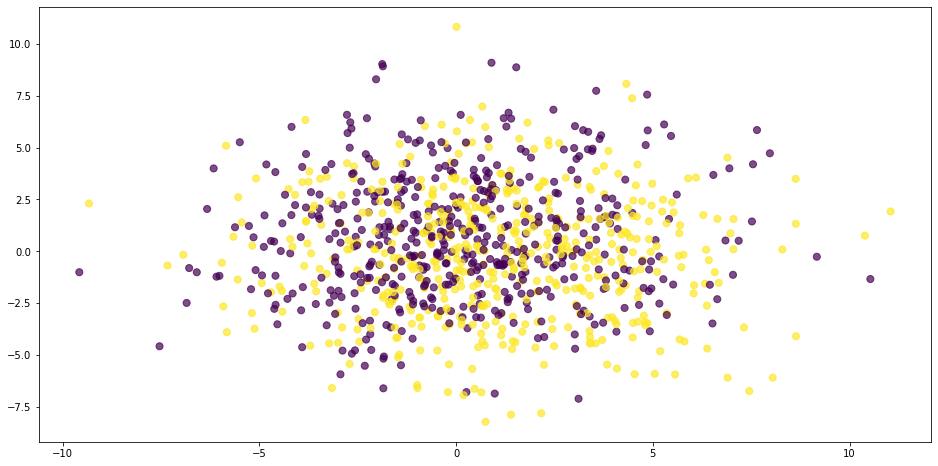

In [16]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=3)
X = data[0] #conjunto de dados a serem classificados 
y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X[:,0], X[:,1], c=y, cmap="viridis", s=50, alpha=0.7)
plt.show(True)

Com um ruiído de valor 3 o padrão de classificação é perdido de um ponto de vista visual e a classificação de cada ponto torna-se uma tarefa muito mais complicada. Para uma melhor demonstração da situação aqui descrita, imagine que lhe ofereceram os seguintes gráficos de dispersão e te contaram que existem dois grupos de pontos que são semelhantes entre si de alguma forma e pedissem para você classificar cada um desses pontos em um dos dois grupos (da forma como estão classificados nos gráficos acima): 

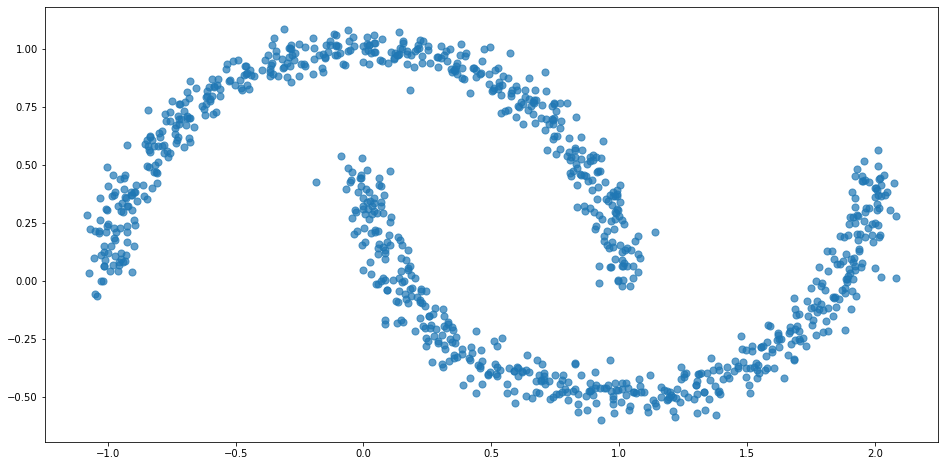

In [17]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X = data[0] #conjunto de dados a serem classificados 
y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X[:,0], X[:,1], cmap="viridis", s=50, alpha=0.7)
plt.show(True)

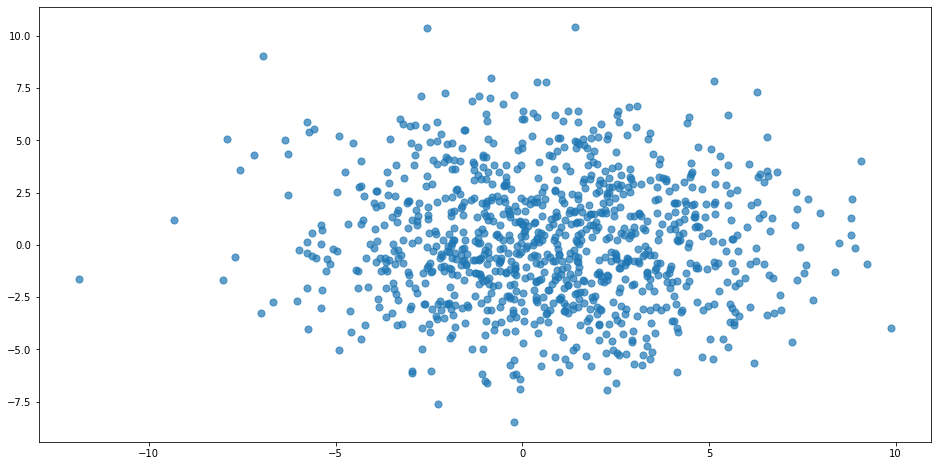

In [19]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=3)
X = data[0] #conjunto de dados a serem classificados 
y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X[:,0], X[:,1], cmap="viridis", s=50, alpha=0.7)
plt.show(True)

Os gráficos foram gerados com os mesmos níveis de ruído que os dois primeiros, mas não foi oferecida a separação entre os grupos com cores. Decifrar o padrão do primeiro gráfico apenas visualmente é uma tarefa relativamente simples, já que o padrão é claro visualmente. Agora, classificar os pontos do gráfico com maior ruído é uma tarefa praticamente impossível de um ponto de vista visual. É deste conceito que surge o fato deste gerador de dados ser interessante para um primeiro teste de algoritmos de classificação, como o que iremos performar neste desenvolvimento.

A ideia é comparar os algoritmos de classificação: Naive-Bayes, classificador bayesiano paramétrico e classificador bayesiano não paramétrico, por meio de sua performance na classificação de dados gerados pelométodo make_moons com diferentes níveis de ruído. Para tal, serão criadas algumas funções que irão facilitar esta comparação de um ponto de vista prático.

### Geração e preparação dos dados

Primeiramente, criemos uma função para a geração dos dados por meio do make_moons de uma maneira simples. A função irá receber os parâmetros n (número de pontos gerados) e ruido (ruído ou "noise" para a geração) e irá devolver a matriz X com as coordenadas bidimencionais dos pontos gerados e o vetor y com a classificação de cada ponto.

In [73]:
def geracao_dados(n, ruido):
    data  = datasets.make_moons(n_samples=n, noise=ruido)
    X = data[0] #conjunto de dados a serem classificados 
    y = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
    
    return X,y

Com os dados em mãos, precisa-se normalizar os dados e separá-los em conjuntos de treino e de teste. Para tal, criou-se a função preparacao_dados a qual recebe os parâmetros "treino" (fração do conjunto de dados que será colocado no conjunto de treino e ajuste, sendo claramente um valor entre 0 e 1), "semente" (valor de seed para a seleção aleatória dos dados em conjuntos de treino e teste), X (matriz com as coordenadas bidimencionais dos pontos gerados) e y (vetor y com a classificação de cada ponto) e retorna os conjuntos x_train, y_train (conjuntos de treino) e x_test, y_test (conjuntos de teste).

In [74]:
def preparacao_dados(treino, semente, X, y):
    import warnings
    warnings.filterwarnings("ignore")

    random.seed(semente)

    # As classes para a classificação são 0 ou 1, ou seja, os dados de X podem ser calssificados como 0 ou 1 
    classes = np.array([0,1])

    # Normalização dos dados 
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # Divisão do conjunto de dados em conjunto de treinamento e conjunto de teste
    p = treino # fração de elementos no conjunto de treino 
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = semente)
    return x_train, x_test, y_train, y_test

A função gerador_preparados é uma combinação das duas funções acima declaradas, a qual simplifica a geração e preparação dos dados em um comando simultâneo caso seja conveniente.

In [75]:
def gerador_preparador(n, semente, ruido, treino):
    
    X,y = geracao_dados(n,ruido)
    x_train, x_test, y_train, y_test = preparacao_dados(treino, semente, X,y)
    return x_train, x_test, y_train, y_test

### Classificador Bayesiano Paramétrico

O primeiro classificador aqui discutido é o Classificador Bayesiano Paramétrico. Tal clasificador utiliza das propriedades do Teorema de Bayes para determianr qual classe tem a maior probabilidade de ser a classe de cada ponto analisado. Assim, é um método que se em estimação por máxima verossimilhança. Para realizar a classificação, o método presume que cada classe é normalmente distribuida (o que o torna paramétrico) e por meio do Teorema de Bayes, obtém-se a probabilidade de cada ponto amostral pertencer a cada classe. Assim, cada ponto é considerado ser da classe mais verossímil (provável) e assim realiza-se a classificação. A função abaixo declarada contém a implementação de tal método e retorna a acurácia obtida considerando-se os conjuntos de treinamento e de teste que ela recebe.

In [76]:
def bayes_parametrico(x_train, x_test, y_train, y_test, classes):
    # Declaração para a matriz que irá armazenar as probabilidades para cada classe

    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

    # (Repare que tal matriz apresenta o mesmo número de linhas que x_train e o número de classes como número de 
    # colunas, assim poderá armazenar a probabilidade de cada ponto observado pertencer a classe 0 ou 1)

    Pc = np.zeros(len(classes)) # Armazenamento da fração de elementos em cada classe (no caso, é um vetor 1x2)


    for i in np.arange(0, len(classes)): # Iteração no número de classes
        elem = tuple(np.where(y_train == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
        Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
        Z = x_train[elem,:][0] # Elementos presentes no conjunto de treinamento
        m = np.mean(Z, axis = 0) # Vetor de médias
        cv = np.cov(np.transpose(Z)) # Matriz de variâncias e covariâncias
        for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
            x = x_test[j,:]
            # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
            pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True) # Modelagem em uma distribuição
            # normal multivariada (Classificador Bayesiano Paramétrico)
            P[classes[i]][j] = pj*Pc[i] # posteriori proporcional a verossimilhança x priori (Teorema de Bayes)

    y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
    for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
        c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
        y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

    # Obtenção da acurácia
    score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
    
    return score

### Classificador Bayesiano Não Paramétrico

O conceito do método do classificador bayesiano não paramétrico é o mesmo do caso paramétrico, a diferença está em como consideramos a distribuição dos elementos em cada classe. Aqui, cria-se uma função densiade utilizando-se denuma função kernel, a qual modelará o comportamento da dsitribuição dos elementos em cada classe.

In [77]:
def bayes_n_parametrico(x_train, x_test, y_train, y_test, classes):
    from sklearn.neighbors import KernelDensity
    
    # Declaração para a matriz que irá armazenar as probabilidades para cada classe

    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes) 

    # (Repare que tal matriz apresenta o mesmo número de linhas que x_train e o número de classes como número de 
    # colunas, assim poderá armazenar a probabilidade de cada ponto observado pertencer a classe 0 ou 1)

    Pc = np.zeros(len(classes)) # Armazenamento da fração de elementos em cada classe (no caso, é um vetor 1x2)
    

    h = 2
    for i in np.arange(0, len(classes)): # Iteração no número de classes
        elem = tuple(np.where(y_train == classes[i])) # Obtenção de tupla correspondente à freq de elem da classe i
        Pc[i] = len(elem)/len(y_train) # Probabilidade de pertencer a classe i (no caso, 0 ou 1)
        Z = x_train[elem,:][0] # Elementos no conjunto de treinamento
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z) # obtenção da dsitribuição multivariada dos 
        for j in np.arange(0,x_test.shape[0]): # Iteração para as observações no conjunto de teste
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            # Obtenção da probabilidade de pertencer a cada classe (conjunto teste)
            pj = np.exp(kde.score_samples(x)) # Atribuição de probabilidades baseado na distribuição kde
            P[classes[i]][j] = pj*Pc[i] # posteriori proporcional a verossimilhança x priori (Teorema de Bayes)

    y_pred = [] # Declaração do vetor que irá armazenar as classes preditas 
    for i in np.arange(0, x_test.shape[0]): # Iteração em len(número de colunas de x_test)
        c = np.argmax(np.array(P.iloc[[i]])) # Identificador (encontra a probabilidade a posteriori com maior valor)
        y_pred.append(classes[c]) # Classificador (classifica os dados de x_test)

    # Obtenção da acurácia
    score = accuracy_score(y_pred, y_test) #Obtém a acurácia do classificador 
    
    
    return score

### Classificador Naive-Bayes

O classificador Naive-Bayes está implementado na biblioteca sklearn, e iremos utilizar tal função implementada, a [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html). A principal diferença aqui utilizada é a condição de que os atributos de cada observação dão independentes.

In [78]:
def naive_bayes(x_train, x_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn import metrics

    model = GaussianNB()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    score = accuracy_score(y_pred, y_test)
    
    return score

Assim, tendo-se os algoritmos de classificação em cada uma das funções declaradas acima, pode-se criar uma função que obtém a acurácia para cada um dos algoritmos considerando-se conjuntos de treino e teste obtidos pela função gerador_preparador.

In [79]:
def comparativo_bayes(x_train, x_test, y_train, y_test, classes):
    
    score1 = bayes_parametrico(x_train, x_test, y_train, y_test, classes)
    score2 = bayes_n_parametrico(x_train, x_test, y_train, y_test, classes)
    score3 = naive_bayes(x_train, x_test, y_train, y_test)
    
    return score1, score2, score3

Agora, façamos uma comparação mais organizada e assertiva para entendermos como tais classificadores se comportam quando deparados com o conjunto de dados de interesse, segue abaixo um teste:

In [80]:
n = 10000 # 10000 amostras
ruido = .09 # valor do ruído
# As classes para a classificação são 0 ou 1, ou seja, os dados de X podem ser calssificados como 0 ou 1 
classes = np.array([0,1])
semente = 19
treino = 0.8

x_train, x_test, y_train, y_test = gerador_preparador(n, semente, ruido, treino)

Façamos um teste considerando-se tais especificações.

In [81]:
score1,score2,score3 = comparativo_bayes(x_train, x_test, y_train, y_test, classes)

print('Acurácia Bayesiano Paramétrico:', score1)
print('Acurácia Bayesiano Não Paramétrico:', score2)
print('Acurácia Naive-Bayes:', score3)

Acurácia Bayesiano Paramétrico: 0.8765
Acurácia Bayesiano Não Paramétrico: 0.8645
Acurácia Naive-Bayes: 0.8765


É notório qye os algoritmos obtiveram acurácias relativamente altas e não muito diferentes entre si. Agora, vamos estudar como tais classificadores se comportam conforme variamos o ruído.

In [82]:
n = 1000 # 10000 amostras
# As classes para a classificação são 0 ou 1, ou seja, os dados de X podem ser calssificados como 0 ou 1 
classes = np.array([0,1])
semente = 19
treino = 0.8

In [107]:
vpassos = [] #vetor que armazena os valores dos ruidos (passos)
vNB = [] #vetor que armazena os valores da acurácia obtidos pelo método Beyesiano Paramétrico
vBNP = [] #vetor que armazena os valores da acurácia obtidos pelo método Beyesiano Não Paramétric0
vBP = [] #vetor que armazena os valores da acurácia obtidos pelo método Naive-Bayes

for i in np.arange(0,3, 0.02): #iteração para os valores do ruído, de 0 a 3 com passos de 0,02
    
    ruido = i
        
    x_train, x_test, y_train, y_test = gerador_preparador(n, semente, ruido, treino)
    score1,score2,score3 = comparativo_bayes(x_train, x_test, y_train, y_test, classes)
    
    
    vBP.append(score1)
    vBNP.append(score2)
    vNB.append(score3)
    vpassos.append(i)

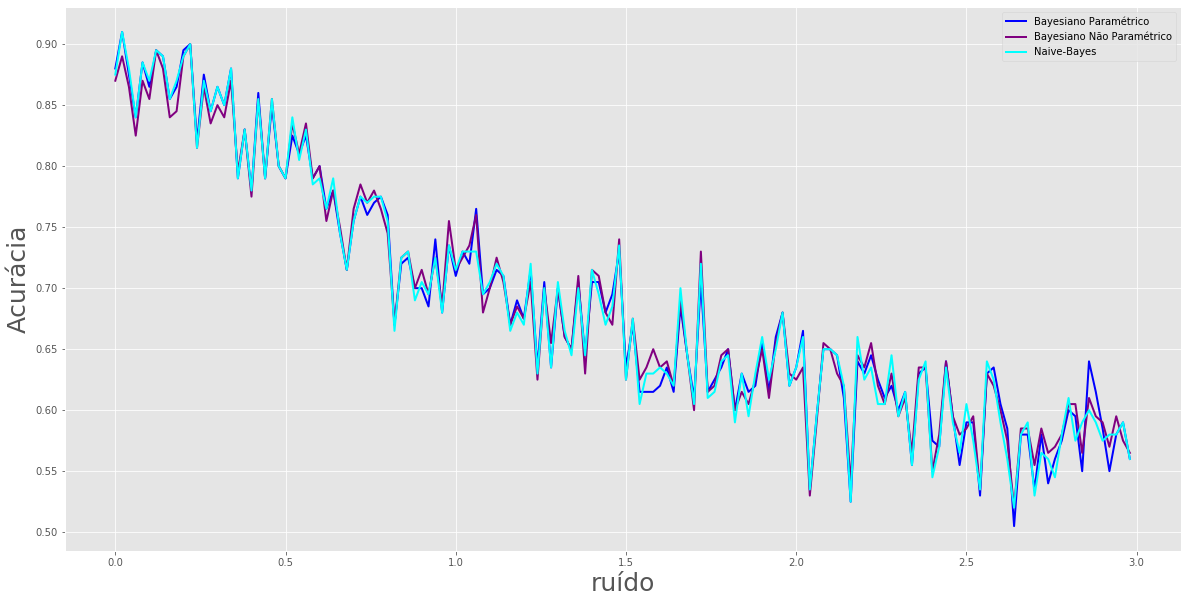

In [108]:
#estilo de gráfico para o matplotlib
plt.style.use('ggplot')

plt.figure(figsize=(20,10))
plt.plot(vpassos, vBP, linestyle='-', color="blue", linewidth=2,label = 'Bayesiano Paramétrico')
plt.plot(vpassos, vBNP, linestyle='-', color="purple", linewidth=2,label = 'Bayesiano Não Paramétrico')
plt.plot(vpassos, vNB, linestyle='-', color="cyan", linewidth=2,label = 'Naive-Bayes')
plt.ylabel("Acurácia", fontsize=25)
plt.xlabel("Ruído", fontsize=25)
plt.legend()
plt.show(True) 

O gráfico acima mostra acurácia dos classificadores conforme variamos o ruído na geração dos dados. Como esperado, quando maior o ruído, menor a acurácia, pois a divisão entre os dados se torna cada vez menos nítida. Mas é interessante notar que os 3 métodos são extremamente semelhantes de um ponto de vista de acurácia, sendo que eles nunca se distanciam em mais de 5% de acerto. Dessa forma, para aplicações mais rápidas e que demandam menos precisão, provavelmente qualquer um dos 3 métodos será interessante para a abordagem do problema. MAs quando a aplicação demanda alta precisão, é interessante anaisar o problema de forma mais minuciosa de um ṕontod e vista estatístico para decidir quais suposições são mais interessantes para modelar o problema. A distribuição dos dados pode ser considerada normal? Talvez um teste de [Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) seja interessante para verificar com qual nível de significância podemos afirmar isso. Os componentes das observações são independentes? Entre outras perguntas, podem ajudar a escolher o melhor modelo. Para aplicações com poucos dados, pode-se ajustar os três modelos e fazer um teste de qual tem a melhor acurácia. Mas para grandes bancos de dados, é interessante ter mais noção de quais condições podemos considerar e qual método seria o melhor candidado para desprender-se tempo e esforço em cima.

## <a name="ex4"></a> 4 - Considerando os dados artificiais do exercício anterior, mostre as regiões de separação para os métodos Naive Bayes, k-vizinhos e regressão logística.

Novamente, importemos as bibliotecas necessárias.

In [38]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import datasets

Para a análise de interesse, iremos utilizar novamente dados gerados pelo método .make_moons, assim sendo, é interessante que tenhamos pelo menos 2 exemplos de dados: um geraado com pouco ruído e outro gerado com ruído considerável. Assim, teremos informações mais interessantes de como se comportam as regiões de separação de cada método aqui estudado.

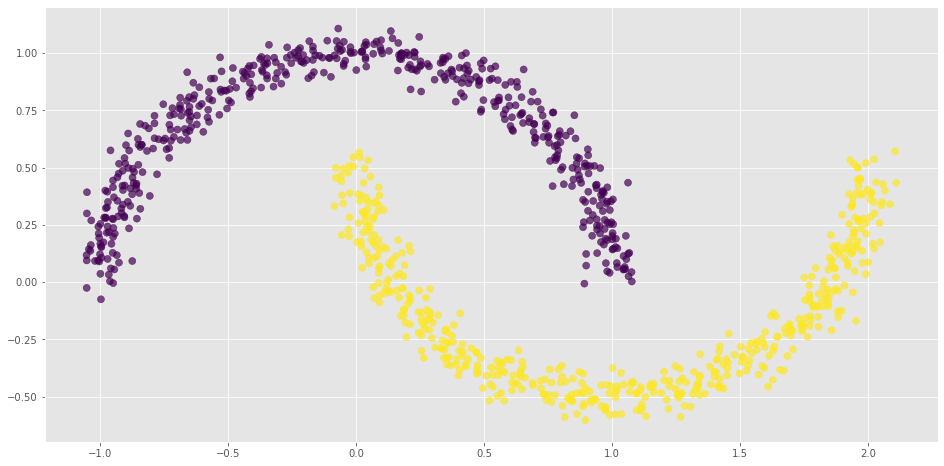

In [39]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=.05)
X1 = data[0] #conjunto de dados a serem classificados 
y1 = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap="viridis", s=50, alpha=0.7)
plt.show(True)

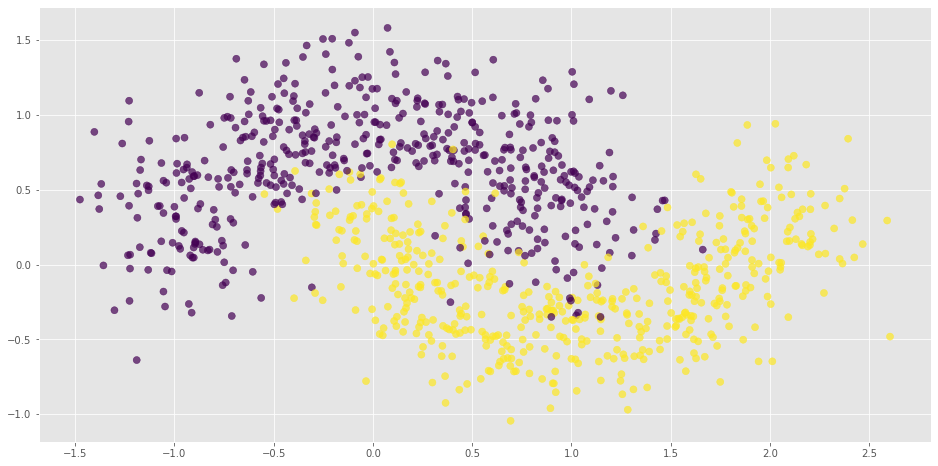

In [40]:
plt.figure(figsize=(16,8))

n_samples = 1000 #número de pontos gerados 
data  = datasets.make_moons(n_samples=n_samples, noise=.25)
X2 = data[0] #conjunto de dados a serem classificados 
y2 = data[1] #classes representados por 0 ou 1 (vetor com classificação dos dados de X)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap="viridis", s=50, alpha=0.7)
plt.show(True)

Agora, tendo-se estes 2 conjuntos de dados em mãos, estudemos as regiões de separação obtidas por meio dos métodos de Naive-Bayes, Regressão Logística e k-vizinhos.

### Conjunto de dados X1, y1

As coordenadas dos dados presentes na matriz gerada pelo método make_moons serão denominadas 'x1' e 'x2'. Abaixo apresentamos as regiões de separação para os métodos estudados. 

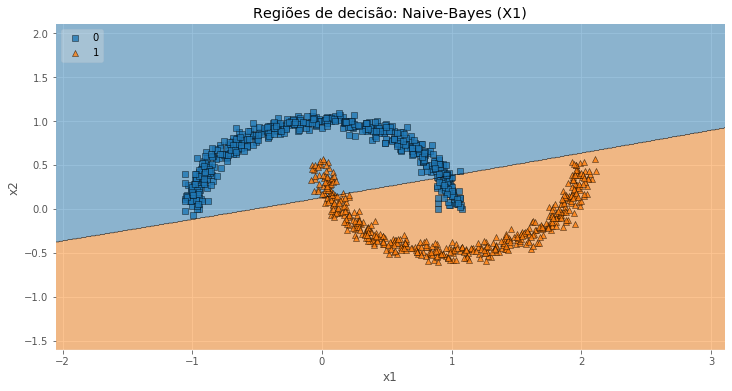

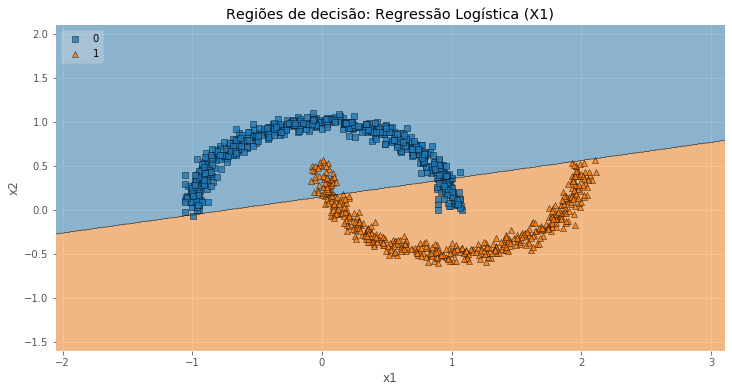

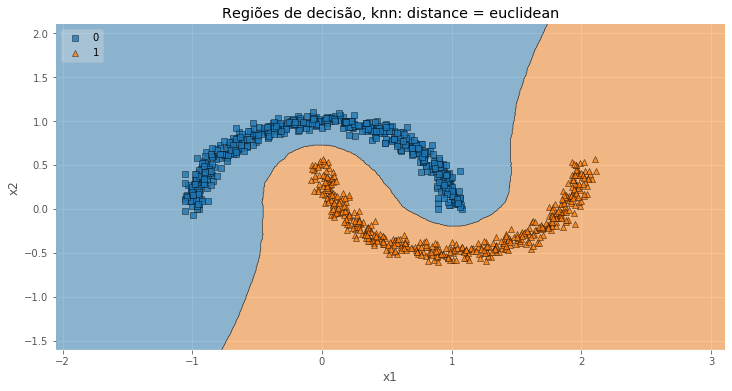

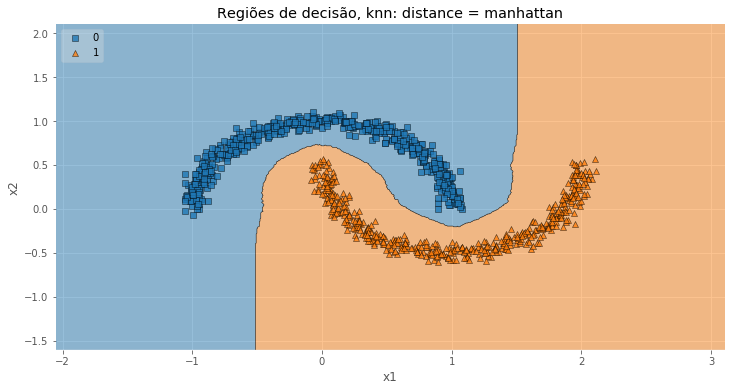

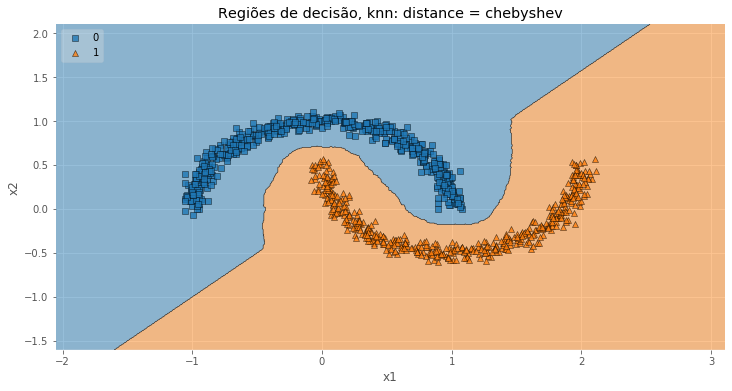

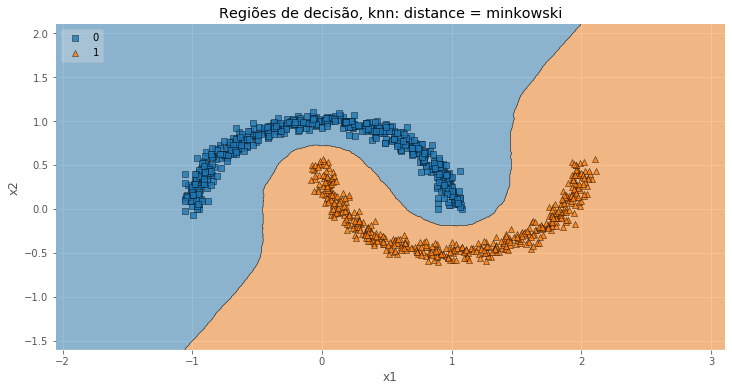

In [41]:
plt.figure(figsize=(12,6))

# Treinando-se o classificador Naive-Bayes
model = GaussianNB()
model.fit(X1, y1)

# Obtendo-se as regiões de separação e colocando-as em um gráfico
plot_decision_regions(X1, y1, clf=model, legend=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Regiões de decisão: Naive-Bayes (X1)')
plt.show()


plt.figure(figsize=(12,6))
# Treinando-se o classificador por Regressão Logística
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X1, y1)
# Obtendo-se as regiões de separação e colocando-as em um gráfico
plot_decision_regions(X1, y1, clf=model, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Regiões de decisão: Regressão Logística (X1)')
plt.show()


vm = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k = 19 #valor escolhido para os k vizinhos mais próximos
for d in vm:
    # Treinando-se o classificador knn
    model = KNeighborsClassifier(n_neighbors=k, metric = d, p=3)
    model.fit(X1, y1)
    # Obtendo-se as regiões de separação e colocando-as em um gráfico
    plt.figure(figsize=(12,6))
    plot_decision_regions(X1, y1, clf=model, legend=2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Regiões de decisão, knn: distance = '+ d)
    plt.show()

É notório que para este conjunto de dados em específico, as regiões de decisão obtidas pelo método knn (independente do tipo de medida utilizada) são muito mais ajustadas ao padrão presente na divisão. As regiões formadas pelo método de Naive-Bayes e pelo método da Regressão Logística são caracterizadas por uma separação linear, a qual não se ajusta bem às características espaciais da dsicposição dos dados, levando à uma acurácia menor na identificação das classes dos pontos. Agora, estudemos o cinjunto de dados X2,y2; o qual possui um nível de ruído maior e mostra-se um desafio maior para classificação.

### Conjunto de dados X2, y2

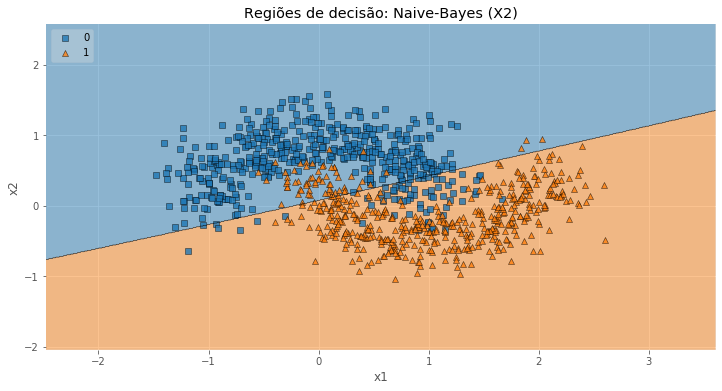

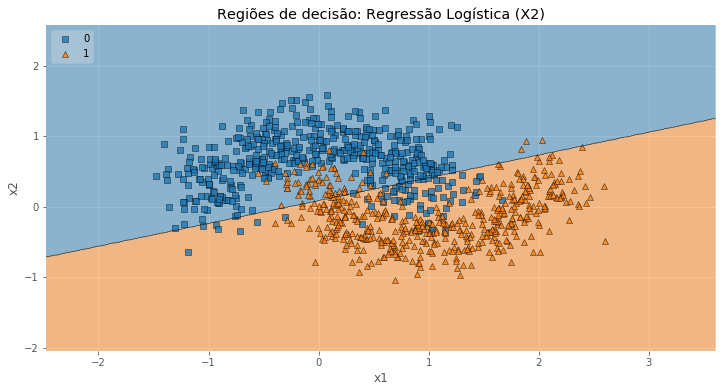

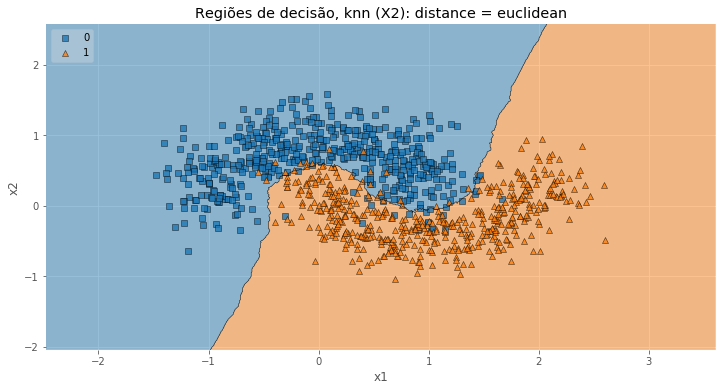

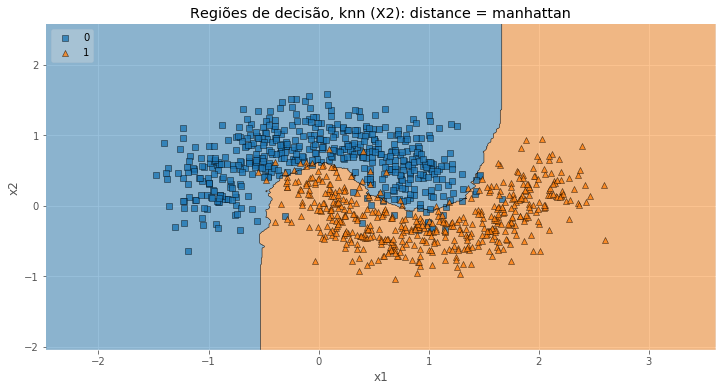

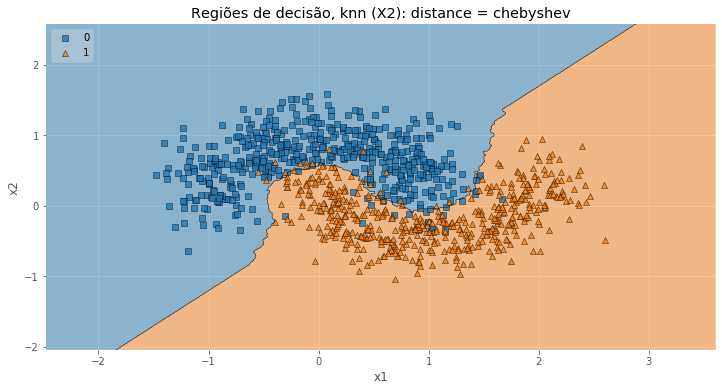

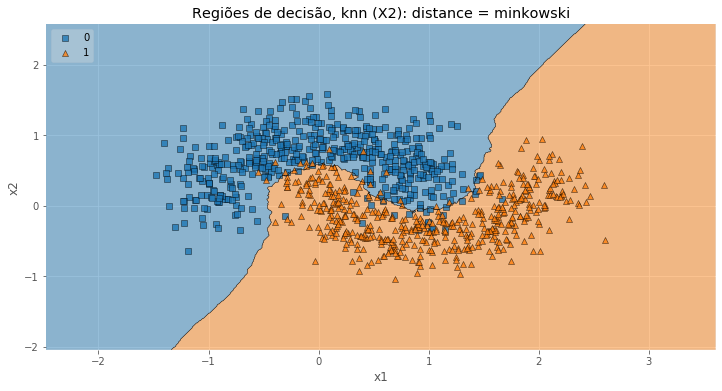

In [42]:
plt.figure(figsize=(12,6))

# Treinando-se o classificador Naive-Bayes
model = GaussianNB()
model.fit(X2, y2)

# Obtendo-se as regiões de separação e colocando-as em um gráfico
plot_decision_regions(X2, y2, clf=model, legend=2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Regiões de decisão: Naive-Bayes (X2)')
plt.show()


plt.figure(figsize=(12,6))
# Treinando-se o classificador por Regressão Logística
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X2, y2)
# Obtendo-se as regiões de separação e colocando-as em um gráfico
plot_decision_regions(X2, y2, clf=model, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Regiões de decisão: Regressão Logística (X2)')
plt.show()


vm = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k = 19 #valor escolhido para os k vizinhos mais próximos
for d in vm:
    # Treinando-se o classificador knn
    model = KNeighborsClassifier(n_neighbors=k, metric = d, p=3)
    model.fit(X2, y2)
    # Obtendo-se as regiões de separação e colocando-as em um gráfico
    plt.figure(figsize=(12,6))
    plot_decision_regions(X2, y2, clf=model, legend=2)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Regiões de decisão, knn (X2): distance = '+ d)
    plt.show()

Novamente, o método knn mostrou um ajuste mais fino ao comportamento dos dados quando comparado com os métodos de Naive-Bayes e de Regressão Logística. É nítido como para um conjunto de dados com este comportamento, o knn mostra-se com maior eficiência na classificação, já que suas regiões de decisão fazem um contorno sobre o formato curvo que os dados apresentam, diferentemente da separação linear resultante dos outros classificadores aqui estudados.

Observação: o número de vizinhos mais próximos escolhido para o knn foi tomado como um número ímpar (19) devido à própria natureza do método de classificação abordado. Escolher um número ímpar previne que ocorram empates em números de vizinhos mais pŕoximos, já que não há como isso ocorrer considerando-se um número ímpar.

## <a name="ex9"></a> 9- Considere os código abaixo. Avalie como o desbalanceamento influencia nos resultados usando as medidas i) AUC (área sob a curva ROC), (ii) precisão, (iii) medida F1 e (iv) acurácia. Elabore um estudo e proceda com o desenvolvimento dos códigos. Dica: use o método de validação cruzada estratificado na classificação discuta a comparação com o caso sem o uso de estratificação.

```
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
row_ix = where(y == label)[0]
pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()
```

In [6]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score
from sklearn import datasets
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
#estilo de gráfico para o matplotlib
plt.style.use('ggplot')

Para realizar a análise aqui sugerida, iremos utilizar da classe criada para a realização dao exercício 8. Assim podemos fazer um procedimento mais organizado, aproveitando-se de alguns aspectos que podem ser de grande ajuda presentes no paradigma de orientação orientada a objetos.

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, roc_auc_score, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize

class Classification:
    # Colocamos como parâmetros iniciais os dados de treino e teste de um dataset
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    # Função retorna um array da predição da classe com nosso conjunto teste com o modelo Naive Bayes
    def naiveBayes(self):
        model = GaussianNB()
        model.fit(self.x_train, self.y_train)

        return model.predict(self.x_test)

    # Função retorna um array da predição da classe com nosso conjunto teste com o modelo Random Forest
    def randomForest(self, estimators):
        model = RandomForestClassifier(n_estimators = estimators, n_jobs = -1)
        model.fit(self.x_train, self.y_train)

        return model.predict(self.x_test)

    # Função retorna um array da predição da classe com nosso conjunto teste com o modelo knn
    def knn(self, k):
        model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        model.fit(self.x_train, self.y_train)
        
        return model.predict(self.x_test) 

    # Função retorna um array da predição da classe com nosso conjunto teste com o modelo Logistic Regression
    def logReg(self):
        model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
        model.fit(self.x_train, self.y_train)

        return model.predict(self.x_test)

    # O AUC retorna a área sob a curva ROC, no caso a média dos AUC's
    def auc(self, y_pred):
        # Binarização de y_test com (n_samples, n_classes)
        ytest = label_binarize(self.y_test, classes = y_test.unique())

        # Binarização de y_pred com (n_samples, n_classes)
        ypreds = label_binarize(y_pred, classes = y_test.unique())

        # É feito a média dos AUC's considerando o ROC feito na comparação ovo = one versus one
        roc = roc_auc_score(ytest, ypreds, multi_class = 'ovo', average = 'macro')

        return roc

    # Retorna a precisão obtida com a classificação
    def precision(self, y_pred):
        return precision_score(self.y_test, y_pred, average = 'macro')

    # Retorna a medida F1 para a classificação
    def f1(self, y_pred):
        return f1_score(self.y_test, y_pred, average = 'macro')

    # Retorna a acurácia da classificação
    def accuracy(self, y_pred):
        return accuracy_score(y_pred, self.y_test)

Primeiramente, analisemos os dados com os quais estamos lidando. O conjunto gerado pela função [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) da biblioteca sklearn gera um conjunto de dados para ser testado em problemas de classificação. No caso estudado, queremos estudar a performance de certos algoritmos de classificação (considerando-se medidas diferentes de performance) para um conjunto de dados desbalanceado, ou seja, um conjunto no qual existem muito mais observações de uma classe do que de outra. No caso estudado, 99% das observações pertencem à classe 0 (negativo) e apenas 1% das observações pertencem à classe 1 (positivo). Façamos alguns procedimentos de visualização para entender melhor como as observações estão dispostas.

Counter({0: 9900, 1: 100})


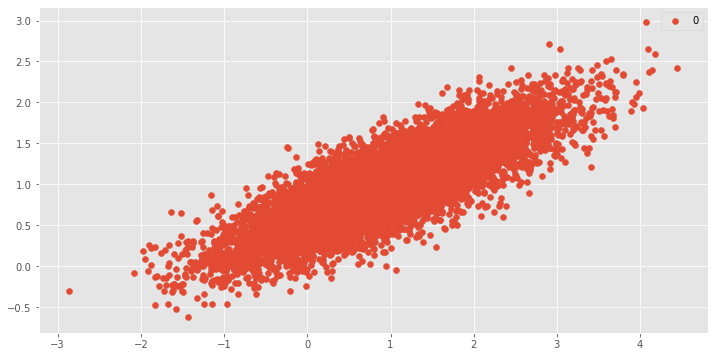

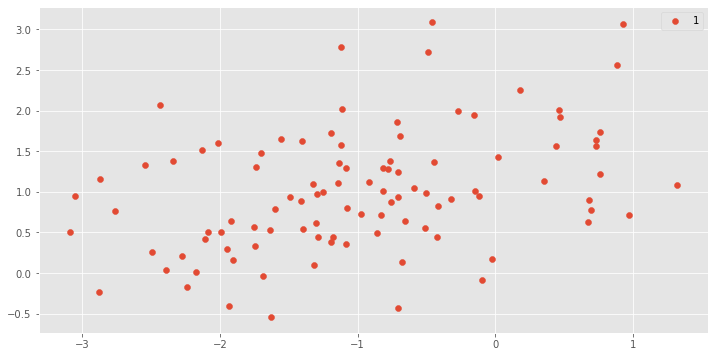

In [8]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1) # parâmetros poem ser vistos no site do scikit-learn,
# citado no hiperlink da célula acima

counter = Counter(y) # número de observações em cada classe
print(counter)

for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.figure(figsize=(12,6)) #esta linha foi acrescentada para gerar gráficos maiores
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    plt.legend()
    plt.show()

É possível perceber o desbalanceamento dos dados por meio dos gráficos acima. Existem muito mais observações negativas (0) do que observações positivas (1). Façamos um dataframe com os dados coletamos para estruturar os dados de melhor forma.

In [9]:
df = pd.DataFrame({'Coordenada 1': X[:,0],'Coordenada 2':X[:,1], 'Classe': y})
df.sample(10)

,Coordenada 1,Coordenada 2,Classe
3325,1.717794,1.259509,0
9150,0.353387,0.546215,0
6207,1.404965,0.741296,0
6112,0.802384,0.883283,0
5767,1.743124,1.359161,0
1138,2.490677,1.626073,0
476,-0.062907,0.472101,0
4457,1.228638,0.757638,0
8385,0.325006,0.816495,0
5704,2.269654,1.486286,0


Criemos um gráfico conjunto para melhor visualização das observações presentes no conjunto de dados.

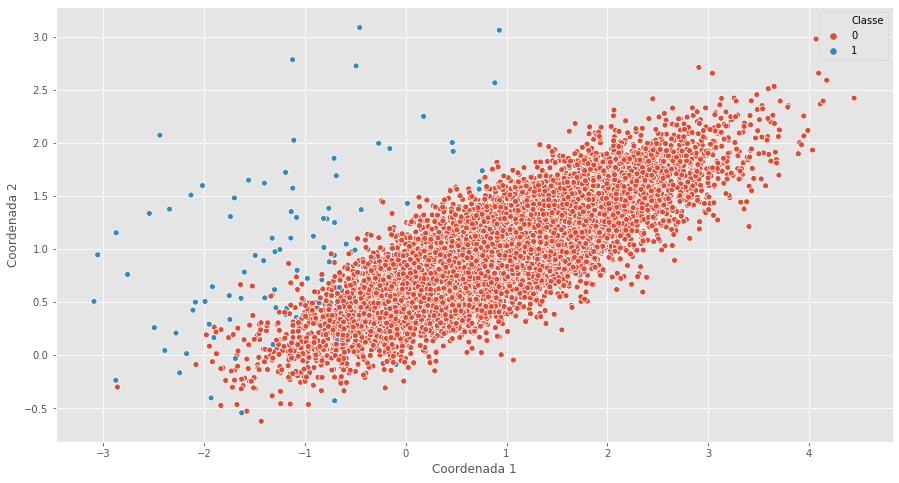

In [10]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = df, x = "Coordenada 1", y = "Coordenada 2", hue = "Classe")
plt.show()

A visualização acima deixa extremamente claro o desbalanceamento dos dados e pode-se notar que o padrão de distribuição das classes acaba não sendo tão trivial, indício de que a classificação poderá ser prejudicada se alguns procedimentos de análise não forem tomados. Agora, performemos a classificação utilizando-se de um procediemnto padrão: a divisão do conjunto de dados em conjunto de treino e conjunto de testes. O conjunto de treino terá 80% do conjunto de dados e a divisão será performada com a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), a qual faz parte do scikit-learn.

In [21]:
p = 0.8 # Fração de elementos que iremos usar no treinamento

X = df.iloc[:,0:2]
scaler = StandardScaler().fit(X) #padronizar os dados
X = scaler.transform(X)

y = df['Classe']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

classDataset = Classification(x_train, x_test, y_train, y_test)

Agora que foi criado um objeto (classDataset) da classe "Classification", pode-se utilizar dos métodos que estão implementados na classe. Assim, pode-se criar vetores com os valores obtidos para cada medida de interesse considerando-se cada um dos métodos de classificação. Tendo-se em mãos tais valores, pode-se criar um dataframe para melhor visualização dos resultados. Para entender melhor como aplicar Programação Orientada a Objetos em python e como criar classes e seus métodos, o leitor pode acessar o tutorial presente neste [link](https://www.datacamp.com/community/tutorials/python-oop-tutorial) do site DataCamp.

In [22]:
nb = ['Naive Bayes', classDataset.auc(classDataset.naiveBayes()), 
      classDataset.precision(classDataset.naiveBayes()), 
      classDataset.f1(classDataset.naiveBayes()), 
      classDataset.accuracy(classDataset.naiveBayes())]

rnfor = ['Random Forest', classDataset.auc(classDataset.randomForest(100)), 
         classDataset.precision(classDataset.randomForest(100)), 
         classDataset.f1(classDataset.randomForest(100)), 
         classDataset.accuracy(classDataset.randomForest(100))]

kn = ['k-NN', classDataset.auc(classDataset.knn(9)), 
      classDataset.precision(classDataset.knn(9)), 
      classDataset.f1(classDataset.knn(9)), 
      classDataset.accuracy(classDataset.knn(9))]

logr = ['Logistic Regression', classDataset.auc(classDataset.logReg()), 
        classDataset.precision(classDataset.logReg()), 
        classDataset.f1(classDataset.logReg()), 
        classDataset.accuracy(classDataset.logReg())]

data = [nb, rnfor, kn, logr] 

tableDataset = pd.DataFrame(data, columns = ['Classificador', 'AUC', 'Precisão', 'Medida F1', 'Acurácia']) 

tableDataset.set_index('Classificador')

,AUC,Precisão,Medida F1,Acurácia
Classificador,,,,
Naive Bayes,0.584957,0.590222,0.587506,0.9865
Random Forest,0.762941,0.783448,0.740282,0.9930
k-NN,0.734538,0.861374,0.784204,0.9940
Logistic Regression,0.734538,0.861374,0.784204,0.9940


Após uma rápida olhada pelo dataframe obtido, é notório que a acurácia, para todos os modelos aplicados, mostrou-se extremamente alta. Todas indicaram pelo menos 98% de acerto pelos modelos aqui estudados para o caso em questão, com alguns chegando a mais de 99% de acerto, como o método RandomForest. Assim, utilizando-se apenas dessa medida para realizar uma análise, concluiriamos que os modelos são excelentes para o problema proposto. Porém, analisando-se as outras medidas, pode-se perceber que suas performances não acompanham a acurácia. Tomemos como exemplo o modelo criado utilizando-se Regressão Logística.
<br>
Olhando-se a linha de resultados referentes à aplicação de um modelo de Regressão Logística para a solução do problema, pode-se notar que a medida de acurácia foi extremamente alta (como discutido acima). Porém, o valor da AUC, da presição e da medida f1 não acompanharam este desempenho. Isso se deve ao fato do conjunto de dados ser desbalanceado. Imaginemos por exemplo, que os dados em discussão são referentes à um contexto e identificação de fraudes em saques de cartão de um banco, sendo as obsrvações positivas (1) fraudulentas e as observações negativas (0) não fraudulentas. Obviamente na vida real, este conjunto de dados seria extremamente desbalanceado como o que estamos estudando, já que operaçoes fraudulentas são muito menos frequentes do que operaçẽos não fraudulentas. Porém, por mais que a acurácia seja boa para nosso modelo nesse exemplo, a presição não é boa o suficiente. Uma presição de 86% indica que apenas 86% dos casos fraudulentos estão sendo detectados, o que claramente não é desejado considerando-se o contexto. As observações que forem de fato fraudulentas devem ser identificadas como tal com a mair porcentagem possível, impedindo gastos e desconforto. Isso ocorrepelo fato do modelo viesar no sentido da classe que contém a maioria observadora das observações no conjunto de treino, já que estas observações são tão frequentes, o classificador pode tender a classificar observações positivas como negativas. A acurácia pode ser enganosa em relação à verdadeira performance do modelo nesse caso. Se o modelo classificasse todas as novas observações como não fraudulentas por exemplo, ele obteria algo próximo de 90% de acurácia para esse caso. O que parece extremamwente satisfatório. Mas na realidade o classificador está falhando em identificar todas as observações positivas, o que o torna um péssimo classificador. Por isso é necessário o estudo de outras medidas para entender melhor como o modelo está se ajustando à situação de interesse. A medida f1 e a a AUC são medidas compostas e tendem a ser menos sensíveis a características extremas do conjunto de dados. Mesmo assim, a utilização das quatro medidas ou outros tipos mostram-se de extrema importância quando há a suspeita de que o conjunto de dados é desbalanceado. Por via das dúvidas, a melhor abordagem é utilizar de um conjunto de medidas que possam sinalizar possíveis caracteristicas do conjunto de dados. Uma precisão baixa com acurácia alta pode indicar que o conjunto é desbalanceado, mas outras combinações entre ass medidas de ineteresse podem ser realizadas com o intuito de compreender melhor como é o comportamento dos dados que temos em mãos e de futuras observações que queremos classificar.
<br>
O exemplo aqui dado pode ser encontrado neste [artigo](https://medium.com/swlh/recall-precision-f1-roc-auc-and-everything-542aedf322b9) do medium, no qual é feita uma breve descrição do comportameo das medidas aqui tratadas. 

### Aplicando-se validação cruzada com K-fold

Para tentar ter uma visão mais clara dos indicadores de interesse e obter um modelo mais adequado para a classificação de observações futuras, apliquemos validação cruzada por meio do método k-fold e estudemos os resultados para cada caso. O procedimento consiste em um método de reamosragem que ajuda a entender se o modelo estudado é realmente adequado para a o problema de classificação que será submetido. Iremos utilizar o valor de 10 o qual é sugerido como um bom valor de teste para quando não se sabe qual seria o melhor valor a ser adotado, como comentado no [artigo](https://machinelearningmastery.com/k-fold-cross-validation/) de Jason Brownlee.

#### Para o classificador de Naive Bayes

In [23]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state=1)

y_np = y.to_numpy()

vacc = []
vauc = []
vpres = []
vf1 = []

for train_index, test_index in cv.split(X, y_np):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]

    classDataset = Classification(x_train, x_test, y_train, y_test)

    y_pred = classDataset.naiveBayes()
    
    auc = roc_auc_score(y_test, y_pred)
    pres = classDataset.precision(y_pred)
    f1 = classDataset.f1(y_pred)
    score = accuracy_score(y_pred, y_test)

    vauc.append(auc)
    vpres.append(pres)
    vf1.append(f1)
    vacc.append(score)

print('Naive Bayes com estratificação:')
print('AUC média:', np.mean(vauc))
print('Precisão média :', np.mean(vpres))
print('Medida F1 média:', np.mean(vf1))
print('Acuracia media:', np.mean(vacc))

Naive Bayes com estratificação:
AUC média: 0.6231313131313132
Precisão média : 0.6931125220340265
Medida F1 média: 0.6457314886889309
Acuracia media: 0.9888


#### Para o classificador Random Forest

In [24]:
vacc = []
vauc = []
vpres = []
vf1 = []

for train_index, test_index in cv.split(X, y_np):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]

    classDataset = Classification(x_train, x_test, y_train, y_test)

    y_pred = classDataset.randomForest(100)
    
    auc = roc_auc_score(y_test, y_pred)
    pres = classDataset.precision(y_pred)
    f1 = classDataset.f1(y_pred)
    score = accuracy_score(y_pred, y_test)

    vauc.append(auc)
    vpres.append(pres)
    vf1.append(f1)
    vacc.append(score)

print('Random Forest com estratificação:')
print('AUC média:', np.mean(vauc))
print('Precisão média :', np.mean(vpres))
print('Medida F1 média:', np.mean(vf1))
print('Acuracia media:', np.mean(vacc))

Random Forest com estratificação:
AUC média: 0.7543434343434344
Precisão média : 0.8979713108932798
Medida F1 média: 0.8071176112856093
Acuracia media: 0.9937999999999999


#### Para o classificador k-NN

In [25]:
vacc = []
vauc = []
vpres = []
vf1 = []

for train_index, test_index in cv.split(X, y_np):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]

    classDataset = Classification(x_train, x_test, y_train, y_test)

    y_pred = classDataset.knn(9)
    
    auc = roc_auc_score(y_test, y_pred)
    pres = classDataset.precision(y_pred)
    f1 = classDataset.f1(y_pred)
    score = accuracy_score(y_pred, y_test)

    vauc.append(auc)
    vpres.append(pres)
    vf1.append(f1)
    vacc.append(score)

print('k-NN com estratificação:')
print('AUC média:', np.mean(vauc))
print('Precisão média :', np.mean(vpres))
print('Medida F1 média:', np.mean(vf1))
print('Acuracia media:', np.mean(vacc))

k-NN com estratificação:
AUC média: 0.7397474747474748
Precisão média : 0.9497680829799184
Medida F1 média: 0.8065285704634491
Acuracia media: 0.9943000000000002


### Para o classificador utilizando a Regressão logística

In [26]:
vacc = []
vauc = []
vpres = []
vf1 = []

for train_index, test_index in cv.split(X, y_np):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y_np[train_index], y_np[test_index]

    classDataset = Classification(x_train, x_test, y_train, y_test)

    y_pred = classDataset.logReg()
    
    auc = roc_auc_score(y_test, y_pred)
    pres = classDataset.precision(y_pred)
    f1 = classDataset.f1(y_pred)
    score = accuracy_score(y_pred, y_test)

    vauc.append(auc)
    vpres.append(pres)
    vf1.append(f1)
    vacc.append(score)

print('Regressão logística com estratificação:')
print('AUC média:', np.mean(vauc))
print('Precisão média :', np.mean(vpres))
print('Medida F1 média:', np.mean(vf1))
print('Acuracia media:', np.mean(vacc))

Regressão logística com estratificação:
AUC média: 0.7547474747474748
Precisão média : 0.9562869767164782
Medida F1 média: 0.8216032551563831
Acuracia media: 0.9945999999999999


É notório que após a aplicação do método de validação cruzada K-fold, pode-se ter uma visão mais clara sobre a eficiencia dos modelos discutidos em um contexto generalizado, ou seja, pode-se entender melhor como o modelo irá se comportar ao se deparar com observações novas com amostragens variadas. Para fazer uma análise mais assertiva, tomemos o classificador utilizando regressão logística, o qual analisamos para o caso em que a validação cruzada não foi aplicada. 
<br>
Pode-se notar que de uma o valor médio para as métricas de interesse é maior do que tinhamos antecipado antes de aplicar a validação cruzada. A precisão que havíamos obtido para o caso em que apelas utilizamos a função train_test_split() foi consideravelmente menor do que a média obtida para a mesma medida com o método k-fold. Isso mostra que o modelo de regressão logística é relativamente robusto para a classificação no contexto do qual o conjunto de dados é proveniente, mesmo que em algumas situações o modelo possa ser viesado a depender de quais dados do conjunto foram utilizados para o treino do modelo. As médias das outras medidas de interesse também mostraram-se melhores do que o antecipado pela análise anterior, a qual baseava-se em apenas uma divisão do conjunto de dados para treino e teste. Aqui podemos notar que a precisão, ainda que não seja o ideal para a questão de identificação de fraudes, obtém valores consideravelmente altos no geral. Porém, a medida F1 e a medida AUC mostram-se ainda baixas em comparação com as outras duas, o que pode nos incentivar a buscar por um modelo mais adequado. O que mostra-se aqui é que a visão sobre o modelo fornecida por métodos mais simples de validação, pode ser muito estreita em relação ao desempenho geral do modelo. Fazendo-se um procedimento de validação cruzada, pode-se ver melhor como o modelo irá se comportar ao classificar dados completamente novos para ele, testando-o diversas vezes com partições diferentes do cunjunto de dados. Assim, a análise realizada para este modelo anteriormente, seria muito raza, já que foi baseada em apenas uma divisão do conjunto de dados, o que não necessariamente representa de forma fiél como o algoritmo irá performar em situações novas. Com a validação cruzada, podemos ter uma visão aproximada mais ampla da performance do modelo e sugerir melhoras ou trocar de modelo.

### Visualização para a medida AUC 

Amedida AUC possui uma interpretação gráfica que permite uma vizualização interessante de seu comportamento. Consideremos o modelo de classificação Random Forest e apliquemos uma divisão simples ao conjunto de dados de interesse uttilizando-se da função train_test_split().

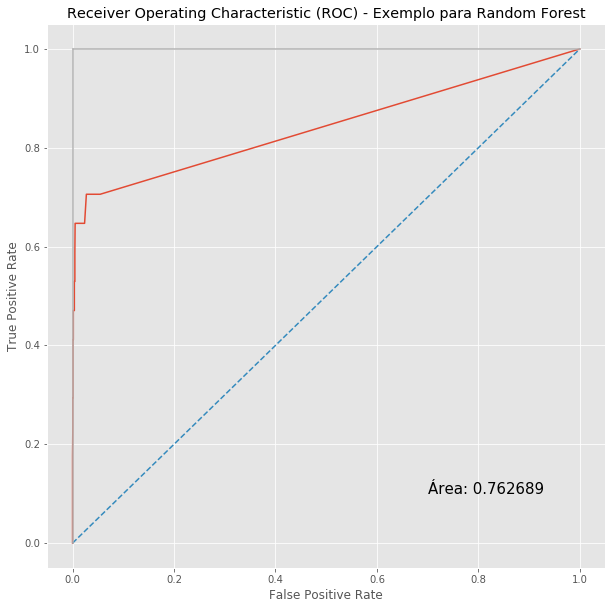

In [28]:
from sklearn.metrics import roc_curve

x_train, x_test, y_train, y_test = train_test_split(X, y_np, train_size = p, random_state = 42)

model = RandomForestClassifier(n_estimators = 100, n_jobs = -1)

model.fit(x_train, y_train)

# Getting predicted probabilities
y_score = model.predict_proba(x_test)[:,1]

# Ploting Receiving Operating Characteristic Curve
# Creating true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score)

# Ploting ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic (ROC) - Exemplo para Random Forest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.text(0.7, 0.1, "Área: {0:4f}".format(roc_auc_score(y_test, model.predict(x_test))), fontsize=15)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Acima, tem-se a curva ROC para o modelo Random Forest criado, a qual mostra o comportamento da taxa de verdadeiros positivos (identificação bem sucedida de uma observação pertencente à classe 1) em relação ao comportamento da taxa de falsos positivos (identificação errônea de uma observação pertencente à classe 0 como pertencente à classe 1). A medida AUC a qual foi utilizada no decorrer do desenvolvimento deste exercício, se trata da área abaixo da curva ROC (Area Under the Curve ROC). CLaramente, quanto maior esta área, melhor o modelo é para a situação de classificação a qual foi submetido. Uma situação em que a AUC vale 1.0, indica que o modelo tem taxa de positivos verdadeiros máxima e taxa de positivos falsos nula, o que indicaria um modelo extremamente adequado. Já uma AUC de 0.5 indicaria que o modelonão tem poder de separabilidade entre as classes, seja por uma limitação do prórpio modleo, seja pelas características do problema de classificação em questão. A visualização acima pode ser interessanre para entender o comportamento das taxas indicadas pelos eixos uma em relação à outra e mostra como a medida pode ser importante para a escolha de um bom modelo.